<a href="https://colab.research.google.com/github/Brunno98/faculdade_analise_dados/blob/main/trabalho_faculdade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ETL

**Dataset usado**: campeonato brasileiro de futebol

**Descrição do dataset**: 18 anos de campeonato brasileiro de futebol 

**link**: https://www.kaggle.com/datasets/adaoduque/campeonato-brasileiro-de-futebol

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Função para recuperar a temporada do campeonato baseado na data da partida,
# com a condição da temporada de 2020 que terminou em 2021-02-25
def get_season(date: str):
  if date.startswith("2021"):
    if date <= "2021-02-25":
      return "2020"
    return "2021"
  return date[:4]

# Carga de datasets

## Carga do dataset de estatisticas das partidas do campeonato brasileiro das temporadas de 2003 até 2021

### **LEGENDA:**

partida_ID - ID da partida

Rodada - Rodada da partida

Clube - Nome do clube

Chutes - Finalizações

Chutes a gol - Finalizações na direção do gol

Posse de bola - Percentual da posse de bola

Passes - Quantidade de passes que o clube deu na partida

precisao_passes - Percentual da precisão de passe

Faltas - Quantidade de faltas cometidas na partida

cartao_amarelo - Quantidade de cartões amarelos para o clube na partida

cartao_vermelho - Quantidade de cartões vermelhos para o clube na partida

Impedimentos - Quantidade de impedimentos para o clube na partida

Escanteios - Quantidade de escanteios para o clube na partida

In [3]:
df_estat = pd.read_csv("/content/campeonato-brasileiro-estatisticas-full.csv")
df_estat.shape

(15290, 13)

In [4]:
df_estat.head()

,partida_id,rodada,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0
1,1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0
2,2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0
3,2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0
4,3,1,Flamengo,0,0,NaN,0,NaN,0,0,0,0,0


## Carga do dataset dos resultados das partidas do campeonato brasileiro das temporadas de 2003 até 2021

### **LEGENDA:**

ID - ID da partida

Rodada : Rodada que aconteceu a partida

Data : Data que ocorreu a partida

Horário :  Horário que ocorreu a partida

Dia : Dia da semana que ocorreu a partida

Mandante : Clube mandante       

Visitante : Clube Visitante

formacao_mandante: Formação do mandante

formacao_visitante: Formação do visitante

tecnico_mandante: Técnico do mandante

tecnico_visitante: Técnico do visitante

Vencedor : Clube vencedor da partida. Quando tiver "-", é um empate

Arena : Arena que ocorreu a partida       

Mandante Placar : Gols que o clube mandante fez na partida  

Visitante Placar : Gols que o clube visitante fez na partida                      

Estado Mandante : Estado do clube mandatorio     

Estado Visitante : Estado do clube visitante              

Estado Vencedor : Estado do clube vencedor. Quando tiver "-", é um empate


In [5]:
df_partida = pd.read_csv("/content/campeonato-brasileiro-full.csv")
df_partida.set_index("ID", inplace=True) # definindo a coluna "ID" como index para realizar o JOIN dos datasets
df_partida.shape

(7645, 17)

filtrando colunas de interesse para analise

In [6]:
df_partida = df_partida[["data", "mandante", "visitante", "vencedor", "mandante_placar", "visitante_placar"]]
df_partida.head()

,data,mandante,visitante,vencedor,mandante_placar,visitante_placar
ID,,,,,,
1,2003-03-29,Guarani,Vasco,Guarani,4,2
2,2003-03-29,Athletico-PR,Gremio,Athletico-PR,2,0
3,2003-03-30,Flamengo,Coritiba,-,1,1
4,2003-03-30,Goias,Paysandu,-,2,2
5,2003-03-30,Internacional,Ponte Preta,-,1,1


## JOIN dos datasets e tratamento do dataframe gerado

In [7]:
df = df_estat.join(df_partida, on="partida_id")
df.head()

,partida_id,rodada,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios,data,mandante,visitante,vencedor,mandante_placar,visitante_placar
0,1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0,2003-03-29,Guarani,Vasco,Guarani,4,2
1,1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0,2003-03-29,Guarani,Vasco,Guarani,4,2
2,2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0,2003-03-29,Athletico-PR,Gremio,Athletico-PR,2,0
3,2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0,2003-03-29,Athletico-PR,Gremio,Athletico-PR,2,0
4,3,1,Flamengo,0,0,NaN,0,NaN,0,0,0,0,0,2003-03-30,Flamengo,Coritiba,-,1,1


## Inserção da coluna "temporada" no dateframe

Criando a coluna "temporada", que representa a temperada do campeonata a qual determinada partida ocorreu

In [8]:
df_temporada = df.copy()
for index, row in df_temporada.iterrows():
  df_temporada.loc[index, "temporada"] = get_season(row["data"])
df_temporada

,partida_id,rodada,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios,data,mandante,visitante,vencedor,mandante_placar,visitante_placar,temporada
0,1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0,2003-03-29,Guarani,Vasco,Guarani,4,2,2003
1,1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0,2003-03-29,Guarani,Vasco,Guarani,4,2,2003
2,2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0,2003-03-29,Athletico-PR,Gremio,Athletico-PR,2,0,2003
3,2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0,2003-03-29,Athletico-PR,Gremio,Athletico-PR,2,0,2003
4,3,1,Flamengo,0,0,NaN,0,NaN,0,0,0,0,0,2003-03-30,Flamengo,Coritiba,-,1,1,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15285,7643,38,Corinthians,1,1,56%,519,85%,22,2,1,0,4,2021-12-12,Juventude,Corinthians,Juventude,1,0,2021
15286,7644,38,Gremio,7,4,37%,328,83%,15,3,0,1,3,2021-12-12,Gremio,Atletico-MG,Gremio,4,3,2021
15287,7644,38,Atletico-MG,13,7,63%,548,88%,11,1,0,0,9,2021-12-12,Gremio,Atletico-MG,Gremio,4,3,2021
15288,7645,38,Santos,13,5,62%,513,84%,17,1,0,0,6,2021-12-12,Santos,Cuiaba,-,1,1,2021


In [9]:
# Numero de registros estatísticos de cada temporada
df_temporada["temporada"].value_counts()

2003    1104
2004    1104
2005     924
2013     760
2020     760
2019     760
2018     760
2017     760
2015     760
2014     760
2012     760
2011     760
2010     760
2009     760
2008     760
2007     760
2006     760
2021     760
2016     758
Name: temporada, dtype: int64

De 2003 a 2005 o compeonato brasileiro era disputado entre 24 equipes;

A partir de 2006 o campeonato passou a ser disputado por 20 equipes;

*Em 2005 houve a anulação de 11 jogos; fonte: [Brasil escola](https://brasilescola.uol.com.br/educacao-fisica/campeonato-brasileiro.htm#Pontos+corridos+e+fim+do+mata-mata)

**Em 2016 a partida entre Chapecoense x Atletico-mg foi cancelada devido ao desastre aéreo da equipe da chapecoense; fonte: [uol](https://www.uol.com.br/esporte/futebol/campeonatos/brasileiro/serie-a/ultimas-noticias/2016/12/11/chapecoense-x-atletico-mg.htm)

In [10]:
# atualizando a referencia do dataframe paro o dataframe atualizado após ter certeza do sucesso do procedimento
df = df_temporada.copy()

## Remoção de registros com NaN

In [11]:
# copia para realizar a operação de drop de forma segura
copy = df.copy()

In [12]:
# verificando valores de "posse_de_bola"
copy["posse_de_bola"].value_counts()

None    778
49%     210
51%     210
48%     203
52%     203
       ... 
22%       3
79%       2
21%       2
80%       1
20%       1
Name: posse_de_bola, Length: 62, dtype: int64

Presença de valores "None" em "posse_de_bola" que deve ser tratado como `NaN`

In [13]:
# Tratando registros que tenha o valor "None" na coluna de "posse_de_bola" como NaN
copy.loc[copy["posse_de_bola"] == "None", "posse_de_bola"] = np.nan

In [14]:
# Contagem de valores NaN no dataframe
copy.isna().sum()

partida_id             0
rodada                 0
clube                  0
chutes                 0
chutes_no_alvo         0
posse_de_bola       9990
passes                 0
precisao_passes     9212
faltas                 0
cartao_amarelo         0
cartao_vermelho        0
impedimentos           0
escanteios             0
data                   0
mandante               0
visitante              0
vencedor               0
mandante_placar        0
visitante_placar       0
temporada              0
dtype: int64

In [15]:
# Contagem de registros por temporada antes do drop
copy["temporada"].value_counts()

2003    1104
2004    1104
2005     924
2013     760
2020     760
2019     760
2018     760
2017     760
2015     760
2014     760
2012     760
2011     760
2010     760
2009     760
2008     760
2007     760
2006     760
2021     760
2016     758
Name: temporada, dtype: int64

In [16]:
# Realizando drop de registros com NaN
droped_na = copy.dropna()

In [17]:
# Contagem de registros por temporada após o drop
droped_na["temporada"].value_counts()

2015    760
2018    760
2021    760
2016    758
2017    758
2020    758
2019    714
2014     32
Name: temporada, dtype: int64

Algumas temporadas estão com menos registros que o esperado (760).

Para o objetivo dessa analise isso não será um grande problema.

Irei remover apenas a temporada 2014 pois possui uma quantidade insuficiente de registros.

In [18]:
# remoção da temporada 2014
droped_na = droped_na.loc[droped_na["temporada"]>"2014",:]
droped_na["temporada"].value_counts()

2015    760
2018    760
2021    760
2016    758
2017    758
2020    758
2019    714
Name: temporada, dtype: int64

In [19]:
# atualizando a referencia do dataframe paro o dataframe atualizado após ter certeza do sucesso do procedimento
df = droped_na.copy()

## Alteração do tipo do valor de "posse_de_bola" de string para int

In [40]:
copy = df.copy()

In [42]:
posse_de_bola = pd.to_numeric(copy["posse_de_bola"].str.strip("%"))

In [43]:
posse_de_bola.value_counts()

51    209
49    209
48    200
52    200
53    199
     ... 
22      3
79      2
21      2
80      1
20      1
Name: posse_de_bola, Length: 61, dtype: int64

In [44]:
copy["posse_de_bola"] = posse_de_bola

In [45]:
copy.head()

,partida_id,rodada,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios,data,mandante,visitante,vencedor,mandante_placar,visitante_placar,temporada
9972,4987,1,Chapecoense,13,0,45,326,None,20,2,0,3,3,2015-05-09,Chapecoense,Coritiba,Chapecoense,2,1,2015
9973,4987,1,Coritiba,16,0,55,388,None,21,2,0,0,5,2015-05-09,Chapecoense,Coritiba,Chapecoense,2,1,2015
9974,4988,1,Palmeiras,17,0,50,406,None,20,2,0,2,11,2015-05-09,Palmeiras,Atletico-MG,-,2,2,2015
9975,4988,1,Atletico-MG,10,0,50,426,None,14,4,0,4,2,2015-05-09,Palmeiras,Atletico-MG,-,2,2,2015
9976,4989,1,Fluminense,26,11,74,702,None,9,2,0,1,5,2015-05-09,Fluminense,Joinville,Fluminense,1,0,2015


In [46]:
df = copy.copy()

# Análise exploratória de dados básicos

###7. Realizar uma visão inicial das 10 primeiras linhas do dataset

In [20]:
df.head(10)

,partida_id,rodada,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios,data,mandante,visitante,vencedor,mandante_placar,visitante_placar,temporada
9972,4987,1,Chapecoense,13,0,45%,326,None,20,2,0,3,3,2015-05-09,Chapecoense,Coritiba,Chapecoense,2,1,2015
9973,4987,1,Coritiba,16,0,55%,388,None,21,2,0,0,5,2015-05-09,Chapecoense,Coritiba,Chapecoense,2,1,2015
9974,4988,1,Palmeiras,17,0,50%,406,None,20,2,0,2,11,2015-05-09,Palmeiras,Atletico-MG,-,2,2,2015
9975,4988,1,Atletico-MG,10,0,50%,426,None,14,4,0,4,2,2015-05-09,Palmeiras,Atletico-MG,-,2,2,2015
9976,4989,1,Fluminense,26,11,74%,702,None,9,2,0,1,5,2015-05-09,Fluminense,Joinville,Fluminense,1,0,2015
9977,4989,1,Joinville,3,0,26%,250,None,14,0,1,1,3,2015-05-09,Fluminense,Joinville,Fluminense,1,0,2015
9978,4990,1,Gremio,11,0,45%,401,None,17,3,0,2,5,2015-05-10,Gremio,Ponte Preta,-,3,3,2015
9979,4990,1,Ponte Preta,17,0,55%,473,None,21,4,1,0,10,2015-05-10,Gremio,Ponte Preta,-,3,3,2015
9980,4991,1,Athletico-PR,10,0,39%,335,None,17,1,0,1,2,2015-05-10,Athletico-PR,Internacional,Athletico-PR,3,0,2015
9981,4991,1,Internacional,17,0,61%,502,None,17,2,0,1,11,2015-05-10,Athletico-PR,Internacional,Athletico-PR,3,0,2015


### 8. Apresentar uma amostra aleatória dos dados

In [23]:
df.sample(5)

,partida_id,rodada,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios,data,mandante,visitante,vencedor,mandante_placar,visitante_placar,temporada
14645,7323,6,Atletico-MG,16,6,67%,541,84%,16,4,0,5,7,2021-06-24,Ceara,Atletico-MG,Ceara,2,1,2021
10404,5203,22,Corinthians,14,8,60%,520,None,12,0,0,0,8,2015-09-02,Corinthians,Fluminense,Corinthians,2,0,2015
11564,5783,4,Gremio,11,2,59%,537,None,15,2,0,3,6,2017-06-04,Gremio,Vasco,Gremio,2,0,2017
13643,6822,32,Gremio,7,2,52%,477,87%,13,2,0,0,2,2019-11-10,Chapecoense,Gremio,Gremio,0,1,2019
13066,6534,3,Gremio,13,7,52%,544,86%,8,2,0,0,8,2019-05-05,Gremio,Fluminense,Fluminense,4,5,2019


### 9. Listar os nomes das colunas

In [24]:
df.columns

Index(['partida_id', 'rodada', 'clube', 'chutes', 'chutes_no_alvo',
       'posse_de_bola', 'passes', 'precisao_passes', 'faltas',
       'cartao_amarelo', 'cartao_vermelho', 'impedimentos', 'escanteios',
       'data', 'mandante', 'visitante', 'vencedor', 'mandante_placar',
       'visitante_placar', 'temporada'],
      dtype='object')

### 10. Verificar a dimensão do dataset (total de linhas e colunas)

In [25]:
df.shape

(5268, 20)

### 11. Contar o total de amostras por uma das variáveis categóricas tanto ordinal ou nominal (textual)


In [245]:
df["clube"].value_counts()

Santos           266
Flamengo         265
Corinthians      265
Palmeiras        264
Fluminense       264
Gremio           264
Sao Paulo        264
Atletico-MG      260
Athletico-PR     246
Sport            228
Internacional    228
Chapecoense      226
Bahia            190
Botafogo-RJ      189
Vasco            188
Cruzeiro         187
Ceara            152
Coritiba         152
America-MG       114
Ponte Preta      114
Atletico-GO      114
Vitoria          114
Fortaleza        113
Avai             112
Goias            112
Figueirense       76
Bragantino        76
Santa Cruz        38
Parana            38
Joinville         38
Cuiaba            38
Juventude         38
CSA               35
Name: clube, dtype: int64

### 12. Destacar os valores máximos das 20 primeiras linhas


In [52]:
df.head(20).max()

partida_id                4996
rodada                       1
clube                    Vasco
chutes                      26
chutes_no_alvo              11
posse_de_bola               74
passes                     702
precisao_passes           None
faltas                      27
cartao_amarelo               5
cartao_vermelho              1
impedimentos                 6
escanteios                  11
data                2015-05-10
mandante                 Vasco
visitante               Santos
vencedor                 Sport
mandante_placar              4
visitante_placar             3
temporada                 2015
dtype: object

### 13. Destacar os valores mínimo das 20 últimas linhas


In [53]:
df.tail(20).min()

partida_id                  7636
rodada                        38
clube                 America-MG
chutes                         1
chutes_no_alvo                 0
posse_de_bola                 31
passes                       260
precisao_passes              69%
faltas                         4
cartao_amarelo                 0
cartao_vermelho                0
impedimentos                   0
escanteios                     2
data                  2021-12-12
mandante              America-MG
visitante           Athletico-PR
vencedor                       -
mandante_placar                1
visitante_placar               0
temporada                   2021
dtype: object

### 14. Realizar o destaque (highlight) dos dois itens anteriores


In [51]:
df.head(20).style.highlight_max()

,partida_id,rodada,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios,data,mandante,visitante,vencedor,mandante_placar,visitante_placar,temporada
9972,4987,1,Chapecoense,13,0,45,326,None,20,2,0,3,3,2015-05-09,Chapecoense,Coritiba,Chapecoense,2,1,2015
9973,4987,1,Coritiba,16,0,55,388,None,21,2,0,0,5,2015-05-09,Chapecoense,Coritiba,Chapecoense,2,1,2015
9974,4988,1,Palmeiras,17,0,50,406,None,20,2,0,2,11,2015-05-09,Palmeiras,Atletico-MG,-,2,2,2015
9975,4988,1,Atletico-MG,10,0,50,426,None,14,4,0,4,2,2015-05-09,Palmeiras,Atletico-MG,-,2,2,2015
9976,4989,1,Fluminense,26,11,74,702,None,9,2,0,1,5,2015-05-09,Fluminense,Joinville,Fluminense,1,0,2015
9977,4989,1,Joinville,3,0,26,250,None,14,0,1,1,3,2015-05-09,Fluminense,Joinville,Fluminense,1,0,2015
9978,4990,1,Gremio,11,0,45,401,None,17,3,0,2,5,2015-05-10,Gremio,Ponte Preta,-,3,3,2015
9979,4990,1,Ponte Preta,17,0,55,473,None,21,4,1,0,10,2015-05-10,Gremio,Ponte Preta,-,3,3,2015
9980,4991,1,Athletico-PR,10,0,39,335,None,17,1,0,1,2,2015-05-10,Athletico-PR,Internacional,Athletico-PR,3,0,2015
9981,4991,1,Internacional,17,0,61,502,None,17,2,0,1,11,2015-05-10,Athletico-PR,Internacional,Athletico-PR,3,0,2015


In [50]:
df.tail(20).style.highlight_min()

,partida_id,rodada,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios,data,mandante,visitante,vencedor,mandante_placar,visitante_placar,temporada
15270,7636,38,Fortaleza,14,6,52,338,80%,15,4,0,3,6,2021-12-12,Fortaleza,Bahia,Fortaleza,2,1,2021
15271,7636,38,Bahia,9,6,48,312,72%,17,2,0,1,3,2021-12-12,Fortaleza,Bahia,Fortaleza,2,1,2021
15272,7637,38,Atletico-GO,13,3,52,466,88%,15,4,0,1,4,2021-12-12,Atletico-GO,Flamengo,Atletico-GO,2,0,2021
15273,7637,38,Flamengo,12,6,48,439,88%,7,2,0,0,6,2021-12-12,Atletico-GO,Flamengo,Atletico-GO,2,0,2021
15274,7638,38,Palmeiras,12,2,31,289,69%,18,2,0,2,5,2021-12-12,Palmeiras,Ceara,Palmeiras,1,0,2021
15275,7638,38,Ceara,31,9,69,620,85%,4,0,0,0,8,2021-12-12,Palmeiras,Ceara,Palmeiras,1,0,2021
15276,7639,38,Fluminense,22,8,68,541,88%,12,3,0,1,9,2021-12-12,Fluminense,Chapecoense,Fluminense,3,0,2021
15277,7639,38,Chapecoense,3,0,32,260,72%,10,2,0,2,3,2021-12-12,Fluminense,Chapecoense,Fluminense,3,0,2021
15278,7640,38,America-MG,19,4,45,383,75%,18,2,0,2,5,2021-12-12,America-MG,Sao Paulo,America-MG,2,0,2021
15279,7640,38,Sao Paulo,11,2,55,463,80%,18,2,0,0,5,2021-12-12,America-MG,Sao Paulo,America-MG,2,0,2021


### 15. Apresentar a estatística básica para o dataset


In [54]:
df.describe()

,partida_id,rodada,chutes,chutes_no_alvo,posse_de_bola,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios,mandante_placar,visitante_placar
count,5268.000000,5268.000000,5268.000000,5268.000000,5268.00000,5268.000000,5268.000000,5268.000000,5268.000000,5268.000000,5268.000000,5268.000000,5268.000000
mean,6312.334093,19.472665,12.714123,3.047077,50.00000,422.300683,15.261579,2.268033,0.124336,1.636484,5.192863,1.400152,0.941534
std,770.145518,10.971398,4.907565,2.722963,10.42603,98.627729,4.499764,1.425016,0.360779,1.511231,2.969117,1.144943,0.980733
min,4987.000000,1.000000,1.000000,0.000000,20.00000,169.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5645.000000,10.000000,9.000000,0.000000,42.00000,351.000000,12.000000,1.000000,0.000000,1.000000,3.000000,1.000000,0.000000
50%,6304.500000,19.000000,12.000000,3.000000,50.00000,418.000000,15.000000,2.000000,0.000000,1.000000,5.000000,1.000000,1.000000
75%,6986.000000,29.000000,16.000000,5.000000,58.00000,486.250000,18.000000,3.000000,0.000000,2.000000,7.000000,2.000000,1.000000
max,7645.000000,38.000000,37.000000,16.000000,80.00000,848.000000,34.000000,10.000000,3.000000,10.000000,23.000000,6.000000,6.000000


### 16. Realizar a análise de correlação, usando o método Pearson

In [56]:
df.corr(method="pearson")

,partida_id,rodada,chutes,chutes_no_alvo,posse_de_bola,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios,mandante_placar,visitante_placar
partida_id,1.000000e+00,1.421612e-01,0.035997,0.515678,-2.279560e-18,0.038165,0.005157,-0.046404,-0.004446,-0.170519,-0.008414,-4.179670e-02,2.005401e-02
rodada,1.421612e-01,1.000000e+00,0.008667,-0.014326,1.179359e-18,-0.047156,0.020147,-0.003818,0.004576,-0.039184,-0.003300,1.519937e-02,-2.075803e-02
chutes,3.599699e-02,8.666847e-03,1.000000,0.430866,4.150266e-01,0.329726,-0.115347,-0.103962,-0.108279,0.029275,0.525622,7.054074e-02,1.010232e-01
chutes_no_alvo,5.156782e-01,-1.432615e-02,0.430866,1.000000,1.417255e-01,0.158820,-0.004755,-0.057516,-0.056595,-0.092178,0.199733,1.173990e-01,1.537448e-01
posse_de_bola,-2.279560e-18,1.179359e-18,0.415027,0.141725,1.000000e+00,0.863132,-0.137807,-0.093530,-0.101152,0.059780,0.415117,-1.582166e-18,-2.123316e-18
passes,3.816518e-02,-4.715596e-02,0.329726,0.158820,8.631319e-01,1.000000,-0.268309,-0.187748,-0.123555,0.001916,0.268083,1.363252e-02,-1.978040e-02
faltas,5.156711e-03,2.014679e-02,-0.115347,-0.004755,-1.378068e-01,-0.268309,1.000000,0.335936,0.004522,-0.033869,-0.107331,-4.534326e-02,-7.590626e-03
cartao_amarelo,-4.640372e-02,-3.818054e-03,-0.103962,-0.057516,-9.352976e-02,-0.187748,0.335936,1.000000,0.014195,0.000554,-0.057049,-3.118828e-02,6.351824e-02
cartao_vermelho,-4.446233e-03,4.576165e-03,-0.108279,-0.056595,-1.011520e-01,-0.123555,0.004522,0.014195,1.000000,-0.029215,-0.053762,1.006622e-02,3.450044e-02
impedimentos,-1.705189e-01,-3.918361e-02,0.029275,-0.092178,5.978004e-02,0.001916,-0.033869,0.000554,-0.029215,1.000000,0.066785,9.139433e-03,-2.557271e-03



### 17. Contar o total de linhas para uma determinada variável categórica

In [58]:
posse_de_bola = df["posse_de_bola"] > 50
len(posse_de_bola)

5268


### 18. Listar as informações sobre o dataset

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 9972 to 15289
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   partida_id        5268 non-null   int64 
 1   rodada            5268 non-null   int64 
 2   clube             5268 non-null   object
 3   chutes            5268 non-null   int64 
 4   chutes_no_alvo    5268 non-null   int64 
 5   posse_de_bola     5268 non-null   int64 
 6   passes            5268 non-null   int64 
 7   precisao_passes   5268 non-null   object
 8   faltas            5268 non-null   int64 
 9   cartao_amarelo    5268 non-null   int64 
 10  cartao_vermelho   5268 non-null   int64 
 11  impedimentos      5268 non-null   int64 
 12  escanteios        5268 non-null   int64 
 13  data              5268 non-null   object
 14  mandante          5268 non-null   object
 15  visitante         5268 non-null   object
 16  vencedor          5268 non-null   object
 17  mandante_p

# Análise Exploratória de Dados com gráficos:

## Análise de Correlação:

In [55]:
import seaborn as sns

In [61]:
import matplotlib.pyplot as plt

In [79]:
desired_columns = [col for col in list(df.columns) if col not in ["partida_id", "rodada"]]

In [83]:
# criando copia com apenas as colunas desejadas
df_graph = df[desired_columns].copy()

### 19. Criar um gráfico heatmap para a análise de correlação do item 16


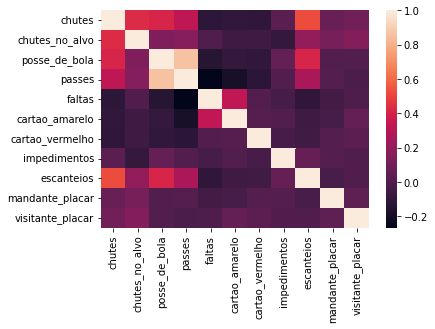

In [84]:
sns.heatmap(df_graph.corr(method="pearson"))
plt.show()

### 20. Criar um scatterplot para o par de variáveis com maior correlação

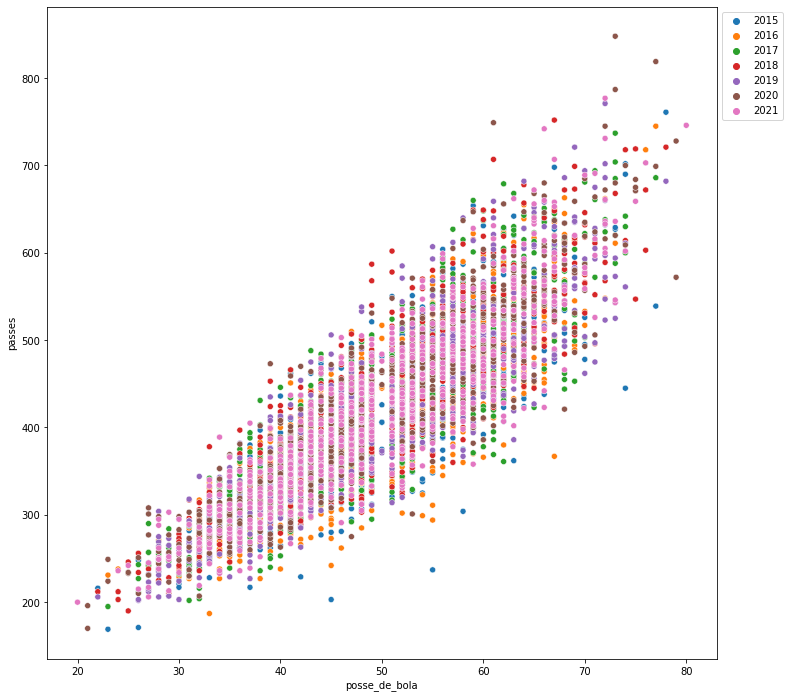

In [287]:
plt.figure(figsize=(12,12))
sns.scatterplot(x="posse_de_bola", y="passes", hue='temporada', data=df_graph)

plt.legend(bbox_to_anchor = (1, 1), loc = 2)

plt.show()

### 21. Criar um correlograma

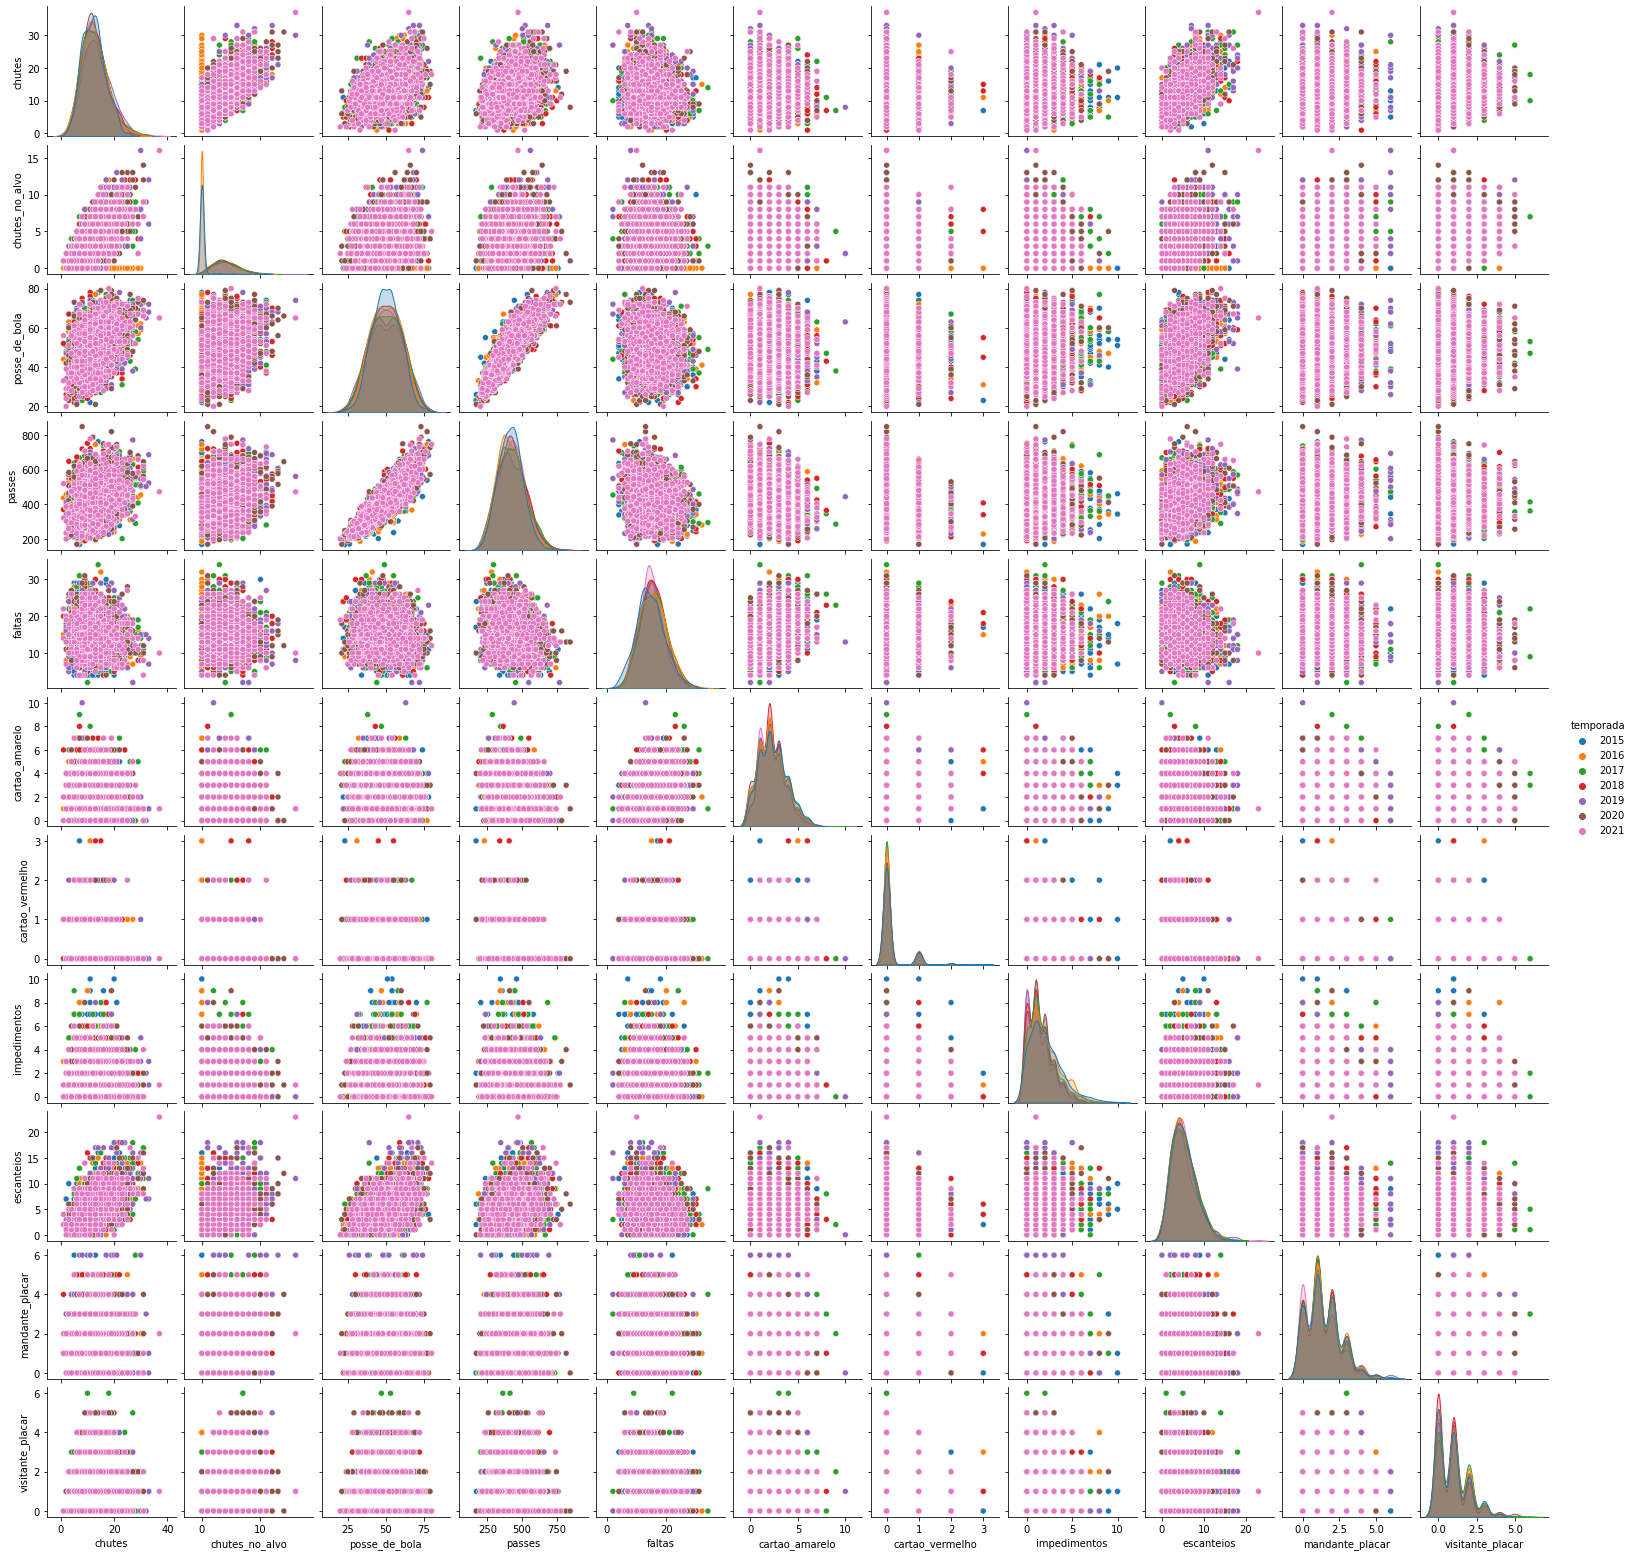

In [86]:
sns.pairplot(df_graph, hue = 'temporada', height = 2)	


### 22. Realizar a análise bivariada por meio de scatterplots para exibir a distribuição dos dados entre as principais variáveis categóricas. Utilize cores e altere o tamanho dos pontos para facilitar a interpretação 

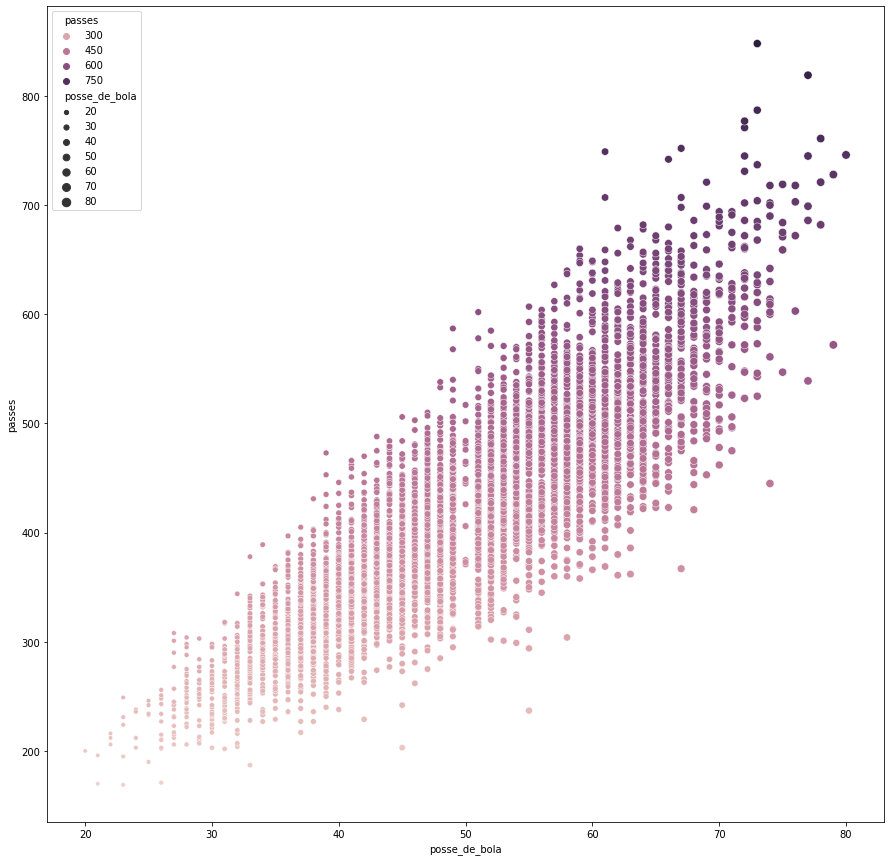

In [286]:
plt.figure(figsize=(15,15))
sns.scatterplot(x="posse_de_bola", y="passes", data=df_graph[["posse_de_bola", "passes"]], color="green", size="posse_de_bola", hue="passes")
plt.show()

## Análise de Distribuição:

### 23. Realizar a análise univariada com um histograma para uma variável numérica


Text(0.5, 0, 'posse de bola')

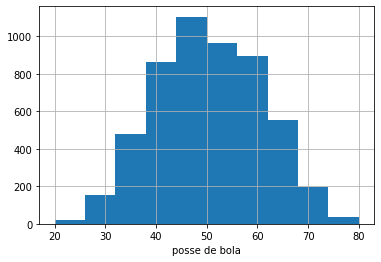

In [120]:
df_graph.posse_de_bola.hist()
plt.xlabel("posse de bola")


### 24. Apresentar em apenas um gráfico vários histogramas para as variáveis numéricas

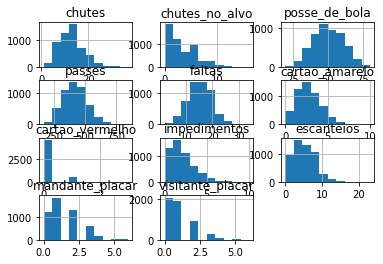

In [284]:
h = df_graph.hist()

### 25. Verificar com boxplots a presença de possíveis outliers

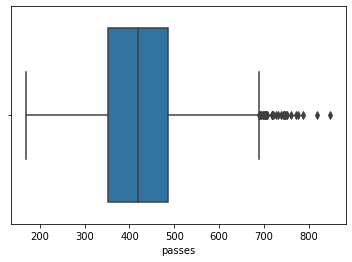

In [125]:
sns.boxplot(x="passes", data=df_graph)


### 26. Remover os outliers, caso existam

In [223]:
df_outliers = df_graph.copy()
df_outliers.reset_index(inplace=True)

# IQR
Q1 = np.percentile(df_outliers['passes'], 25, interpolation = 'midpoint')
  
Q3 = np.percentile(df_outliers['passes'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
  
# Acima do limite
upper = np.where(df_outliers['passes'] >= (Q3 + 1.5 * IQR))
  
# Abaixo do limite
lower = np.where(df_outliers['passes'] <= (Q1 - 1.5 * IQR))

In [226]:
# antes da remoção
df_outliers.shape

(5268, 19)

In [227]:
# Remoção dos outliers
df_outliers.drop(upper[0], inplace = True)
df_outliers.drop(lower[0], inplace = True)

In [228]:
# apos remocao
df_outliers.shape

(5234, 19)

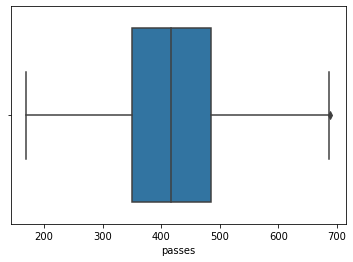

In [229]:
sns.boxplot(x="passes", data=df_outliers)


### 27. Apresentar um gráfico de densidade para uma variável numérica

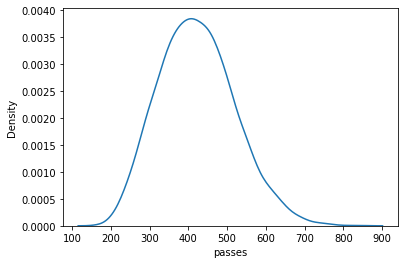

In [238]:
sns.kdeplot(df_graph["passes"])


### 28. Apresentar um gráfico de densidade para mais de uma variável numérica

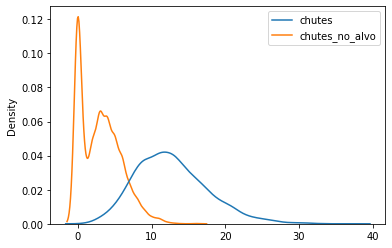

In [243]:

sns.kdeplot(data=df_graph[["chutes", "chutes_no_alvo"]])

## Gráficos de classificação ou rankeamento:

### 29. Criar um gráfico de barras ou colunas para exibir também o resultado do item 11

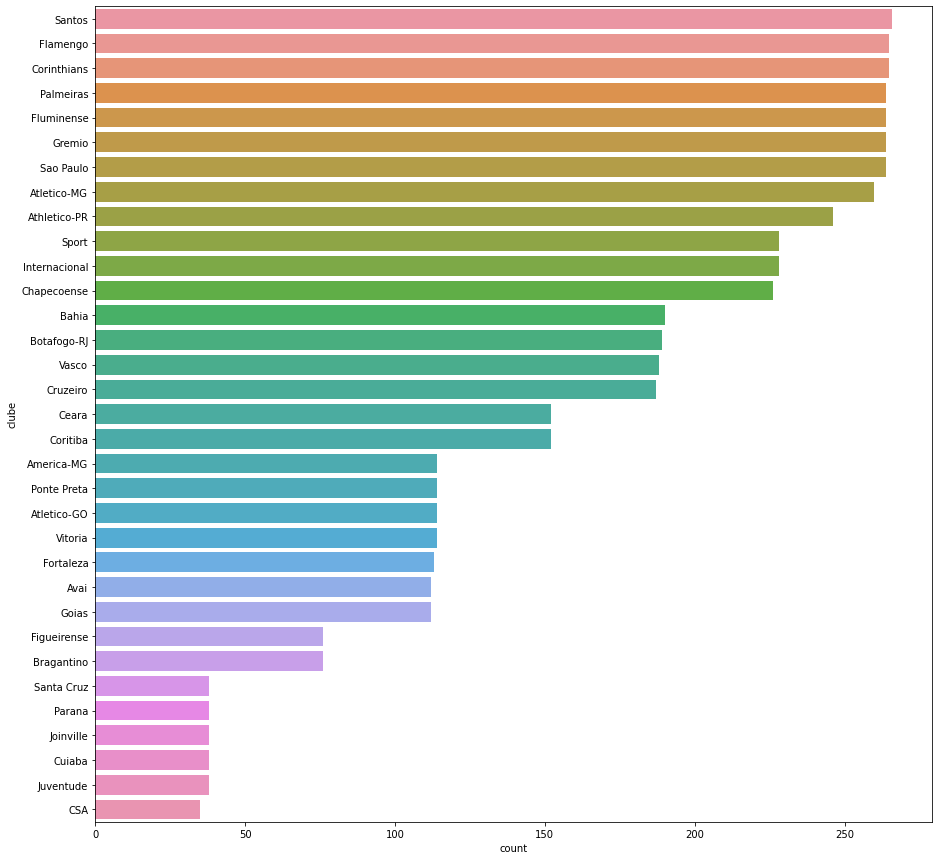

In [279]:
plt.figure(figsize=(15,15))
sns.countplot(y="clube", data=df_graph, order=df_graph["clube"].value_counts().index)


### 30. Criar um gráfico de nuvem palavras, caso seu dataset permita

In [288]:
#! pip install wordcloud
from wordcloud import WordCloud

In [300]:
series_clubes = df_graph["clube"]
clubes = " ".join(list(series_clubes))
clubes

'Chapecoense Coritiba Palmeiras Atletico-MG Fluminense Joinville Gremio Ponte Preta Athletico-PR Internacional Sao Paulo Flamengo Cruzeiro Corinthians Sport Figueirense Avai Santos Vasco Goias Goias Athletico-PR Coritiba Gremio Corinthians Chapecoense Figueirense Vasco Atletico-MG Fluminense Flamengo Sport Santos Cruzeiro Joinville Palmeiras Ponte Preta Sao Paulo Internacional Avai Sao Paulo Joinville Vasco Internacional Gremio Figueirense Palmeiras Goias Chapecoense Santos Athletico-PR Atletico-MG Fluminense Corinthians Avai Flamengo Cruzeiro Ponte Preta Sport Coritiba Ponte Preta Chapecoense Coritiba Avai Joinville Athletico-PR Santos Sport Goias Gremio Atletico-MG Vasco Corinthians Palmeiras Internacional Sao Paulo Flamengo Fluminense Figueirense Cruzeiro Athletico-PR Figueirense Vasco Ponte Preta Chapecoense Joinville Sao Paulo Santos Cruzeiro Flamengo Avai Atletico-MG Gremio Corinthians Fluminense Coritiba Sport Goias Palmeiras Internacional Atletico-MG Cruzeiro Flamengo Chapecoen

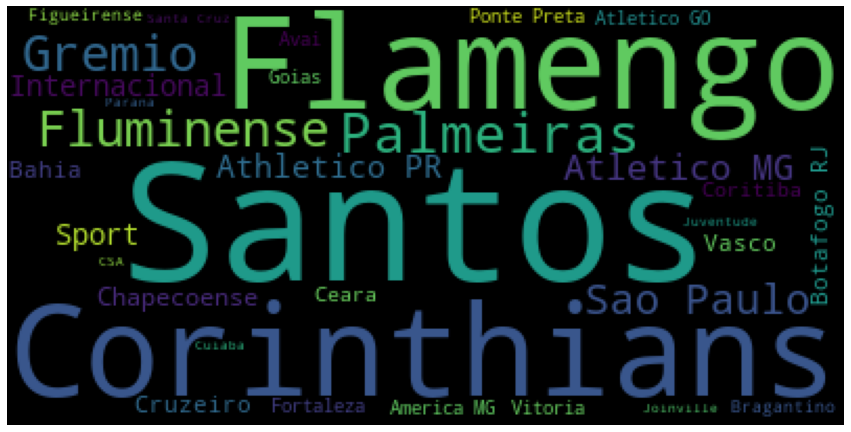

In [302]:
plt.figure(figsize = (15,15))

plt.axis('off')

plt.imshow(WordCloud().generate(clubes))  

## Gráficos de partes ou setores:

### 31. Criar um gráfico de pizza ou setores para uma variável categórica com porcentagens

In [315]:
posse_de_bola = df["posse_de_bola"]
series_le_30 = posse_de_bola.loc[posse_de_bola <= 30]
series_range_40 = posse_de_bola.loc[(posse_de_bola > 30) & (posse_de_bola <= 40)]
series_range_50 = posse_de_bola.loc[(posse_de_bola >= 40) & (posse_de_bola <= 50)]
series_ge_60 = posse_de_bola.loc[posse_de_bola >= 60]

In [320]:
data = {
    "30% or less": series_le_30,
    "40% - 50%": series_range_40,
    "50% - 60%": series_range_50,
    "60% or more": series_ge_60
}
df_posse_de_bola = pd.DataFrame(data)
df_posse_de_bola.head()

,30% or less,40% - 50%,50% - 60%,60% or more
9972,NaN,NaN,45.0,NaN
9974,NaN,NaN,50.0,NaN
9975,NaN,NaN,50.0,NaN
9976,NaN,NaN,NaN,74.0
9977,26.0,NaN,NaN,NaN


In [323]:
posse_de_bola = df[["posse_de_bola"]].copy()
posse_de_bola

,posse_de_bola
9972,45
9973,55
9974,50
9975,50
9976,74
...,...
15285,56
15286,37
15287,63
15288,62


In [330]:
def get_range(possesion):
  if possesion < 40:
    return "39% or less"
  if possesion < 50:
    return "40%"
  if possesion < 60:
    return "50%"
  return "60% or more"
  
posse_de_bola["label"] = posse_de_bola["posse_de_bola"].apply(get_range)
posse_de_bola.head()

,posse_de_bola,label
9972,45,40%
9973,55,50%
9974,50,50%
9975,50,50%
9976,74,60% or more


In [333]:
posse_de_bola["label"].value_counts()

40%            1721
50%            1599
60% or more    1044
39% or less     904
Name: label, dtype: int64

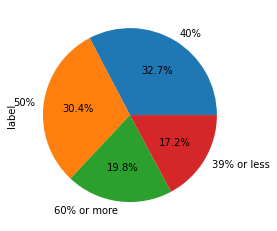

In [332]:
posse_de_bola["label"].value_counts().plot.pie(autopct='%1.1f%%')

## Gráficos de evolução:


### 32. Criar um gráfico de evolução para as variáveis numéricas

## Análise dos Dados:

### 33. Realizar uma análise que pode ser uma nuvem de palavras, mineração de dados (associação, clusterização ou classificação)